***
---

# Housing in London Dataset Analysis <br>

<span style='color:darkgrey'>For this project I will be both exploring and analysing the provided Housing Prices Dataset with a view to identifying:</span>

<br>

<span style='color:darkgreen'>
- important values or value ranges with respect to key variables (along with other relevant attributes)
</span>
<br>
<br>
<span style='color:darkgreen'>
- relationships and correlations between variables (if any)
</span>
<br>
<br>
<span style='color:darkgreen'>
- issues with the data in terms of null values and how to best process them - replace with mean or median values for example
</span>
<br>
<br>
<span style='color:darkgreen'>
- limitations of the data in terms of data types and evaluating their usefulness / making conversions where necessary.</span>
<br>
<br>

<span style='color:darkgrey'>The aim is to ultimately identify:</span> 

<br>

* ***If houses are appreciating or depreciating in value based on locality***
 
 
* ***What factors / variables are relevant in determining this***
 
 
* ***Provide persuasive visuals to support the conclusions***
 
 
***
---

In [629]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [630]:
df = pd.read_csv("housing_in_london_monthly_variables.csv")

In [631]:
df2 = pd.read_csv("housing_in_london_yearly_variables.csv")

In [632]:
#get overview of content 
#df.head(3)
#df.tail(3)
df.iloc[0:3]

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1


In [633]:
#get overview of content 
#df.head(3)
#df.tail(3)
df2.iloc[0:3]

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1


In [634]:
#become familiar with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [635]:
#become familiar with data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [636]:
#become familiar with stats
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


In [637]:
#become familiar with stats
df2.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
count,1049.000000,352.000000,1.018000e+03,9.310000e+02,6.660000e+02,6.660000e+02,1071.000000
mean,27977.792183,7.485057,6.042576e+06,3.188095e+06,3.724903e+05,8.814682e+05,0.647059
std,6412.807487,0.198451,1.526810e+07,8.058302e+06,2.157060e+06,3.690376e+06,0.478108
min,15684.000000,7.000000,6.581000e+03,4.700000e+04,3.150000e+02,5.009000e+03,0.000000
25%,23857.000000,7.350000,2.243458e+05,9.450000e+04,2.960000e+03,8.763550e+04,0.000000
50%,27441.000000,7.510000,2.946035e+05,1.570000e+05,4.323000e+03,1.024020e+05,1.000000
75%,30932.000000,7.640000,4.630098e+06,2.217000e+06,8.220000e+03,1.262760e+05,1.000000
max,61636.000000,7.960000,6.643555e+07,3.575000e+07,1.330373e+07,2.417217e+07,1.000000


In [638]:
#len(df.index)
#len(df)
df.shape

(13549, 7)

In [639]:
#len(df.index)
#len(df)
df2.shape

(1071, 12)

In [640]:
df.values

array([['1995-01-01', 'city of london', 91449, ..., 17.0, nan, 1],
       ['1995-02-01', 'city of london', 82203, ..., 7.0, nan, 1],
       ['1995-03-01', 'city of london', 79121, ..., 14.0, nan, 1],
       ...,
       ['2019-11-01', 'england', 248515, ..., 67814.0, nan, 0],
       ['2019-12-01', 'england', 250410, ..., nan, nan, 0],
       ['2020-01-01', 'england', 247355, ..., nan, nan, 0]], dtype=object)

In [641]:
df2.values

array([['E09000001', 'city of london', '1999-12-01', ..., nan, nan, 1],
       ['E09000002', 'barking and dagenham', '1999-12-01', ..., nan, nan,
        1],
       ['E09000003', 'barnet', '1999-12-01', ..., nan, nan, 1],
       ...,
       ['N92000002', 'northern ireland', '2019-12-01', ..., nan, nan, 0],
       ['S92000003', 'scotland', '2019-12-01', ..., nan, nan, 0],
       ['W92000004', 'wales', '2019-12-01', ..., nan, nan, 0]],
      dtype=object)

In [642]:
df.columns

Index(['date', 'area', 'average_price', 'code', 'houses_sold', 'no_of_crimes',
       'borough_flag'],
      dtype='object')

In [643]:
df2.columns

Index(['code', 'area', 'date', 'median_salary', 'life_satisfaction',
       'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs',
       'area_size', 'no_of_houses', 'borough_flag'],
      dtype='object')

In [644]:
df.index

RangeIndex(start=0, stop=13549, step=1)

In [645]:
df2.index

RangeIndex(start=0, stop=1071, step=1)

***
---

### Transforming DataFrames

***
---

In [646]:
# sort out average prices:
average_house_prices_sort = df.sort_values("average_price", ascending=False)

In [647]:
print(average_house_prices_sort.head(10))

            date                    area  average_price       code  \
6001  2018-01-01  kensington and chelsea        1463378  E09000020   
6008  2018-08-01  kensington and chelsea        1418032  E09000020   
5990  2017-02-01  kensington and chelsea        1412255  E09000020   
5992  2017-04-01  kensington and chelsea        1399839  E09000020   
5989  2017-01-01  kensington and chelsea        1394421  E09000020   
6003  2018-03-01  kensington and chelsea        1392610  E09000020   
5993  2017-05-01  kensington and chelsea        1388174  E09000020   
6009  2018-09-01  kensington and chelsea        1388037  E09000020   
5991  2017-03-01  kensington and chelsea        1380049  E09000020   
6002  2018-02-01  kensington and chelsea        1378878  E09000020   

      houses_sold  no_of_crimes  borough_flag  
6001        129.0        1737.0             1  
6008        103.0        2339.0             1  
5990        109.0        1367.0             1  
5992        124.0        1723.0      

In [648]:
area_values = df['area'].unique()
print(area_values)

['city of london' 'barking and dagenham' 'barnet' 'bexley' 'brent'
 'bromley' 'camden' 'croydon' 'ealing' 'enfield' 'tower hamlets'
 'greenwich' 'hackney' 'south east' 'hammersmith and fulham' 'haringey'
 'harrow' 'havering' 'hillingdon' 'hounslow' 'islington'
 'kensington and chelsea' 'kingston upon thames' 'lambeth' 'lewisham'
 'merton' 'newham' 'redbridge' 'richmond upon thames' 'southwark' 'sutton'
 'waltham forest' 'wandsworth' 'westminster' 'inner london' 'outer london'
 'north east' 'north west' 'yorks and the humber' 'east midlands'
 'west midlands' 'east of england' 'london' 'south west' 'england']


In [649]:
# sort out average prices in across areas:
average_house_prices_across_areas_sort = df.sort_values(["area", "average_price"], ascending=[True, False])

In [650]:
print(average_house_prices_across_areas_sort.head(10))

           date                  area  average_price       code  houses_sold  \
599  2019-11-01  barking and dagenham         305882  E09000002        124.0   
597  2019-09-01  barking and dagenham         305277  E09000002        125.0   
598  2019-10-01  barking and dagenham         304153  E09000002        131.0   
587  2018-11-01  barking and dagenham         302606  E09000002        169.0   
600  2019-12-01  barking and dagenham         301816  E09000002          NaN   
588  2018-12-01  barking and dagenham         301114  E09000002        141.0   
601  2020-01-01  barking and dagenham         301057  E09000002          NaN   
596  2019-08-01  barking and dagenham         300702  E09000002        154.0   
586  2018-10-01  barking and dagenham         299648  E09000002        161.0   
595  2019-07-01  barking and dagenham         299538  E09000002        141.0   

     no_of_crimes  borough_flag  
599        1653.0             1  
597        1649.0             1  
598        1794.0

In [651]:
# gain a rough idea of average house prices across the whole dataset.
# this is NOT an accurate representation of the data as the date (range) is from 1995 to 2020.
# it may be more useful to see averages across a yearly basis for example.
# nonetheless - this may be useful in order to obtain a comparison with a 25year average!
print(df.dtypes['average_price'])

int64


In [652]:
print(df.loc[:, 'average_price'].max())

1463378


In [653]:
print(df.loc[:, 'average_price'].min())

40722


In [654]:
print(df.loc[:, 'average_price'].mean())

263519.68433094694


In [655]:
# filter for rows where the average_price is greater than 263520 (the mean).
average_price_above_overall_average = df[df["average_price"] > 263520]
print(average_price_above_overall_average)

             date            area  average_price       code  houses_sold  \
70     2000-11-01  city of london         321773  E09000001         18.0   
71     2000-12-01  city of london         314772  E09000001         33.0   
72     2001-01-01  city of london         284262  E09000001         24.0   
81     2001-10-01  city of london         263887  E09000001         26.0   
82     2001-11-01  city of london         346458  E09000001         15.0   
...           ...             ...            ...        ...          ...   
12942  2019-09-01      south east         324501  E12000008      11102.0   
12943  2019-10-01      south east         323581  E12000008      11788.0   
12944  2019-11-01      south east         323951  E12000008      11599.0   
12945  2019-12-01      south east         324515  E12000008          NaN   
12946  2020-01-01      south east         320700  E12000008          NaN   

       no_of_crimes  borough_flag  
70              NaN             1  
71             

In [656]:
# gain a rough idea of the houses sold across the whole dataset.
# this is NOT an accurate representation of the data as some areas are going to sell better than others based on:
# ... size of area; density of houses in a given area.
# it may be more useful as a marker when factoring in ease of resale for example!
# there be a hidden reason for a large number of houses being sold in an area - e.g. unreasonable cost of living!
# there may be a hidden reason for large numbers NOT selling - e.g. contentment in the area!
print(df.dtypes['houses_sold'])

float64


In [657]:
print(df.loc[:, 'houses_sold'].max())

132163.0


In [658]:
print(df.loc[:, 'houses_sold'].min())

2.0


In [659]:
print(df.loc[:, 'houses_sold'].mean())

3893.9941285767372


In [660]:
# filter for rows where the number of houses_sold is greater than 3894 (the mean).
houses_sold_above_overall_average = df[df["houses_sold"] > 3894]
print(houses_sold_above_overall_average)

             date          area  average_price       code  houses_sold  \
3356   1998-04-01    south east          83176  E12000008      15354.0   
9954   1996-05-01  inner london          82457  E13000001       4068.0   
9955   1996-06-01  inner london          83723  E13000001       3987.0   
9956   1996-07-01  inner london          84789  E13000001       4873.0   
9957   1996-08-01  inner london          85391  E13000001       4698.0   
...           ...           ...            ...        ...          ...   
13542  2019-07-01       england         248562  E92000001      70681.0   
13543  2019-08-01       england         249432  E92000001      75079.0   
13544  2019-09-01       england         249942  E92000001      64605.0   
13545  2019-10-01       england         249376  E92000001      68677.0   
13546  2019-11-01       england         248515  E92000001      67814.0   

       no_of_crimes  borough_flag  
3356            NaN             0  
9954            NaN             0  
995

In [661]:
# gain a rough idea of the number of crimes across the whole dataset.
# I would predict crime rates to be higher in cities.
# High crimes rates may deter people from buying in certain areas!
print(df.dtypes['no_of_crimes'])

float64


In [662]:
print(df.loc[:, 'no_of_crimes'].max())

7461.0


In [663]:
print(df.loc[:, 'no_of_crimes'].min())

0.0


In [664]:
print(df.loc[:, 'no_of_crimes'].mean())

2158.3520634493884


In [665]:
# filter for rows where the no_of_crimes is less than 2158 (the mean).
no_of_crimes_below_average = df[df["no_of_crimes"] < 2158]
print(no_of_crimes_below_average)

            date            area  average_price       code  houses_sold  \
72    2001-01-01  city of london         284262  E09000001         24.0   
73    2001-02-01  city of london         198137  E09000001         37.0   
74    2001-03-01  city of london         189033  E09000001         44.0   
75    2001-04-01  city of london         205494  E09000001         38.0   
76    2001-05-01  city of london         223459  E09000001         30.0   
...          ...             ...            ...        ...          ...   
9624  2019-01-01      wandsworth         587609  E09000032        304.0   
9625  2019-02-01      wandsworth         579970  E09000032        297.0   
9627  2019-04-01      wandsworth         578421  E09000032        265.0   
9631  2019-08-01      wandsworth         593268  E09000032        427.0   
9635  2019-12-01      wandsworth         604056  E09000032          NaN   

      no_of_crimes  borough_flag  
72             0.0             1  
73             0.0           

In [666]:
# early testing ...
# let's say we want to find out where in London house prices are below the 25 year average and where ...
# ... crimes rates are also below the average.
lower_cost_lower_crime_london = df[(df["area"] == "london") & (df["average_price"] < 263520) & (df["no_of_crimes"] < 2158)]
print(lower_cost_lower_crime_london)

Empty DataFrame
Columns: [date, area, average_price, code, houses_sold, no_of_crimes, borough_flag]
Index: []


In [667]:
# two criterias above not met together so try OR (|) operator instead of AND (&) ...
lower_cost_OR_lower_crime_london = df[(df["area"] == "london") & (df["average_price"] < 263520) | (df["no_of_crimes"] < 2158)]
print(lower_cost_OR_lower_crime_london)

             date            area  average_price       code  houses_sold  \
72     2001-01-01  city of london         284262  E09000001         24.0   
73     2001-02-01  city of london         198137  E09000001         37.0   
74     2001-03-01  city of london         189033  E09000001         44.0   
75     2001-04-01  city of london         205494  E09000001         38.0   
76     2001-05-01  city of london         223459  E09000001         30.0   
...           ...             ...            ...        ...          ...   
12517  2009-04-01          london         245351  E12000007       4323.0   
12518  2009-05-01          london         249991  E12000007       5011.0   
12519  2009-06-01          london         253596  E12000007       6001.0   
12520  2009-07-01          london         259793  E12000007       7900.0   
12521  2009-08-01          london         262076  E12000007       7548.0   

       no_of_crimes  borough_flag  
72              0.0             1  
73             

In [668]:
# let's try another early test ...
# ... focussing on an area of northwest/west London ...
nw_london = ["harrow", "hillingdon", "hounslow"]
northwest_london = df[df["area"].isin(nw_london)]
average_house_prices_across_nwlondon_sort = northwest_london.sort_values(["area", "average_price"], ascending=[True, False])
print(average_house_prices_across_nwlondon_sort)

            date      area  average_price       code  houses_sold  \
4493  2017-10-01    harrow         479341  E09000015        156.0   
4487  2017-04-01    harrow         476522  E09000015        149.0   
4494  2017-11-01    harrow         475681  E09000015        197.0   
4488  2017-05-01    harrow         474678  E09000015        150.0   
4497  2018-02-01    harrow         474510  E09000015        148.0   
...          ...       ...            ...        ...          ...   
5125  1995-03-01  hounslow          72098  E09000018        263.0   
5126  1995-04-01  hounslow          71890  E09000018        211.0   
5138  1996-04-01  hounslow          71630  E09000018        301.0   
5137  1996-03-01  hounslow          71603  E09000018        293.0   
5124  1995-02-01  hounslow          71052  E09000018        145.0   

      no_of_crimes  borough_flag  
4493        1265.0             1  
4487        1156.0             1  
4494        1206.0             1  
4488        1213.0             

In [669]:
# date is a really powerful variable ...
# I intend to use it for line graphs - measuring changes in average price, houses sold and crime numbers!
print(df.loc[:, 'date'].min())
print(df.loc[:, 'date'].max())

1995-01-01
2020-01-01


In [670]:
# investigating "date" ...
# add a year column to the df dataframe ...

df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["year"] = df["date"].dt.year
print(df.dtypes['year'])

int64


***
---

### Aggregating DataFrames

***
---

In [671]:
# efficient summaries ...
# ... these may be more useful than simply looking at mean (average) values as done in the previous section!

def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

print(df[["average_price", "houses_sold", "no_of_crimes"]].agg(iqr))

average_price    204463.0
houses_sold        2899.0
no_of_crimes        959.0
dtype: float64


In [672]:
# efficient summaries continued ...
print(df[["average_price", "houses_sold", "no_of_crimes"]].agg([iqr, np.median]))

        average_price  houses_sold  no_of_crimes
iqr          204463.0       2899.0         959.0
median       222919.0        371.0        2132.0


In [673]:
# counting categorical variables
# quick check to see that we do in fact have an equal distribution of monitoring across all areas
area_counts = df["area"].value_counts()
print(area_counts)
area_counts_proportion = df["area"].value_counts(normalize=True)
print(area_counts_proportion)

hackney                   302
south east                302
enfield                   302
tower hamlets             302
redbridge                 301
richmond upon thames      301
southwark                 301
sutton                    301
waltham forest            301
wandsworth                301
westminster               301
inner london              301
outer london              301
city of london            301
merton                    301
north east                301
north west                301
yorks and the humber      301
east midlands             301
west midlands             301
east of england           301
london                    301
south west                301
newham                    301
kingston upon thames      301
lewisham                  301
lambeth                   301
barnet                    301
bexley                    301
brent                     301
bromley                   301
camden                    301
croydon                   301
ealing    

In [674]:
# let's generate some aggregate average price results for each area ...
# average_price_for_each_area_stats = df.groupby("area")["average_price"].agg([np.min, np.max, np.mean])
# print(average_price_for_each_area_stats)

In [675]:
# let's generate some aggregate houses_sold results for each area ...
# houses_sold_for_each_area_stats = df.groupby("area")["houses_sold"].agg([np.min, np.max, np.mean])
# print(houses_sold_for_each_area_stats)

In [676]:
# let's generate some aggregate crime_numbers results for each area ...
# crime_numbers_for_each_area_stats = df.groupby("area")["no_of_crimes"].agg([np.min, np.max, np.mean])
# print(crime_numbers_for_each_area_stats)

In [677]:
# instead of groupby, it would be better to use pivot tables!
average_price_for_each_area_stats = df.pivot_table(values="average_price", index="area", aggfunc=[np.mean, np.median])
print(average_price_for_each_area_stats)
# show as a visualization in the next section

                                 mean        median
                        average_price average_price
area                                               
barking and dagenham    159852.930233      163607.0
barnet                  304991.089701      304015.0
bexley                  189570.737542      193417.0
brent                   270291.252492      263886.0
bromley                 254160.621262      255177.0
camden                  467500.910299      446413.0
city of london          423942.584718      382571.0
croydon                 209349.671096      211896.0
ealing                  274537.322259      269520.0
east midlands           121649.890365      138440.0
east of england         171182.229236      185049.0
enfield                 223130.629139      226148.5
england                 153068.843854      173046.0
greenwich               213056.471761      214017.0
hackney                 284985.331126      273589.5
hammersmith and fulham  443791.860465      422518.0
haringey    

In [678]:
houses_sold_for_each_area_stats = df.pivot_table(values="houses_sold", index="area", aggfunc=[np.mean, np.median])
print(houses_sold_for_each_area_stats)
# show as a visualization in the next section

                                mean      median
                         houses_sold houses_sold
area                                            
barking and dagenham      198.989967       185.0
barnet                    446.983278       434.0
bexley                    325.588629       318.0
brent                     272.953177       267.0
bromley                   496.709030       483.0
camden                    248.702341       249.0
city of london             25.371237        22.0
croydon                   487.979933       471.0
ealing                    368.033445       351.0
east midlands            6801.752508      6889.0
east of england          9397.324415      9256.0
enfield                   385.448161       375.0
england                 77182.732441     76702.0
greenwich                 314.802676       303.0
hackney                   218.581940       215.0
hammersmith and fulham    252.568562       240.0
haringey                  271.444816       259.0
harrow              

In [679]:
crime_numbers_for_each_area_stats = df.pivot_table(values="no_of_crimes", index="area", aggfunc=[np.mean, np.median])
print(crime_numbers_for_each_area_stats)
# show as a visualization in the next section

                               mean       median
                       no_of_crimes no_of_crimes
area                                            
barking and dagenham    1599.275109       1608.0
barnet                  2278.441048       2242.0
bexley                  1299.458515       1299.0
brent                   2415.602620       2433.0
bromley                 2020.131004       1989.0
camden                  3056.572052       2976.0
city of london             0.423423          0.0
croydon                 2652.943231       2643.0
ealing                  2607.061135       2625.0
enfield                 2077.921397       2048.0
greenwich               2154.899563       2191.0
hackney                 2575.751092       2532.0
hammersmith and fulham  1914.676856       1906.0
haringey                2406.427948       2381.0
harrow                  1256.598253       1227.0
havering                1530.358079       1523.0
hillingdon              2141.768559       2188.0
hounslow            

***
---

### Creating and Visualizing DataFrames

***
---

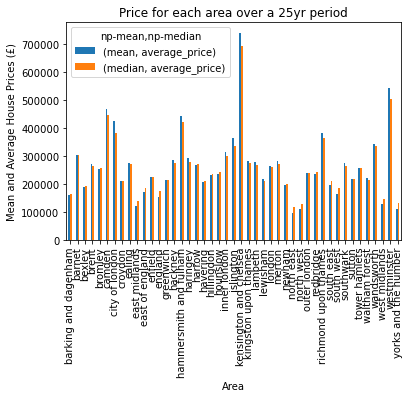

In [680]:
# recap ...
# average_price_for_each_area_stats = df.pivot_table(values="average_price", index="area", aggfunc=[np.mean, np.median])

average_price_for_each_area_stats.columns = average_price_for_each_area_stats.columns.rename('np-mean', level=0)
average_price_for_each_area_stats.columns = average_price_for_each_area_stats.columns.rename('np-median', level=1)
average_price_for_each_area_stats.plot(title="Price for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Mean and Average House Prices (£)")
plt.show()

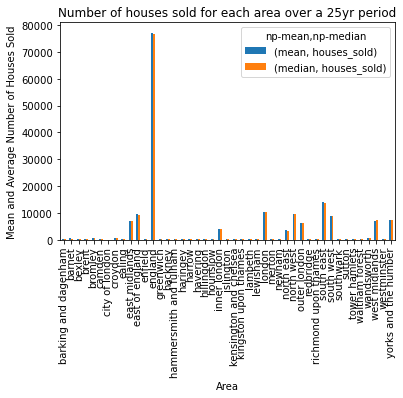

In [681]:
# houses_sold_for_each_area_stats = df.pivot_table(values="houses_sold", index="area", aggfunc=[np.mean, np.median])

houses_sold_for_each_area_stats.columns = houses_sold_for_each_area_stats.columns.rename('np-mean', level=0)
houses_sold_for_each_area_stats.columns = houses_sold_for_each_area_stats.columns.rename('np-median', level=1)
houses_sold_for_each_area_stats.plot(title="Number of houses sold for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Mean and Average Number of Houses Sold")
plt.show()

# on the basis of this plot - it would be interesting to remove 'England' as one of the areas!

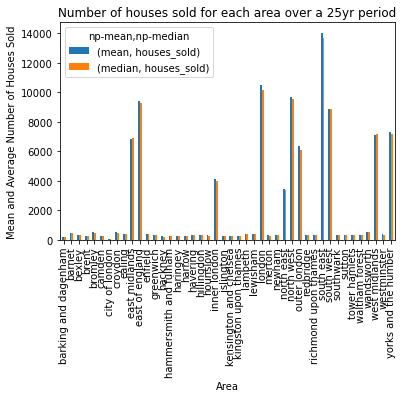

In [682]:
# this was my solution to removing "england" but it seems very inefficient!

not_including_england = df[(df["area"] != "england")]

houses_sold_for_each_area_bar_england_stats = not_including_england.pivot_table(values="houses_sold", index="area", aggfunc=[np.mean, np.median])
houses_sold_for_each_area_bar_england_stats.columns = houses_sold_for_each_area_bar_england_stats.columns.rename('np-mean', level=0)
houses_sold_for_each_area_bar_england_stats.columns = houses_sold_for_each_area_bar_england_stats.columns.rename('np-median', level=1)
houses_sold_for_each_area_bar_england_stats.plot(title="Number of houses sold for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Mean and Average Number of Houses Sold")
plt.show()

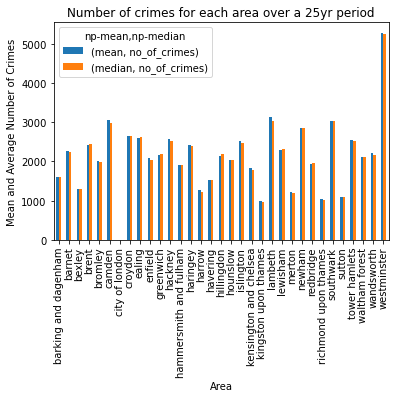

In [683]:
# crime_numbers_for_each_area_stats = df.pivot_table(values="no_of_crimes", index="area", aggfunc=[np.mean, np.median])

crime_numbers_for_each_area_stats.columns = crime_numbers_for_each_area_stats.columns.rename('np-mean', level=0)
crime_numbers_for_each_area_stats.columns = crime_numbers_for_each_area_stats.columns.rename('np-median', level=1)
crime_numbers_for_each_area_stats.plot(title="Number of crimes for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Mean and Average Number of Crimes")
plt.show()

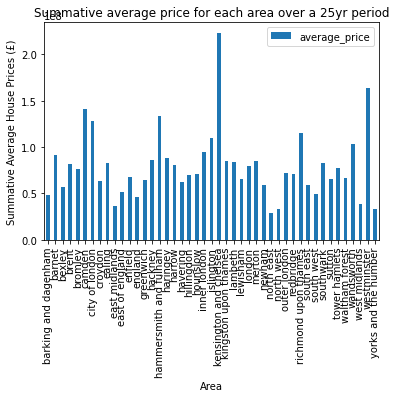

In [684]:
# early visualizations (from groupbys above)

# average_price_for_each_groupby_area = df.groupby("area")["average_price"].sum()
# average_price_for_each_groupby_area.plot(kind="bar")
# plt.show()

# convert from groupbys to pivot tables

summative_average_price_for_each_area = df.pivot_table(values="average_price", index="area", aggfunc='sum')
summative_average_price_for_each_area.plot(title="Summative average price for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Summative Average House Prices (£)")
plt.show()

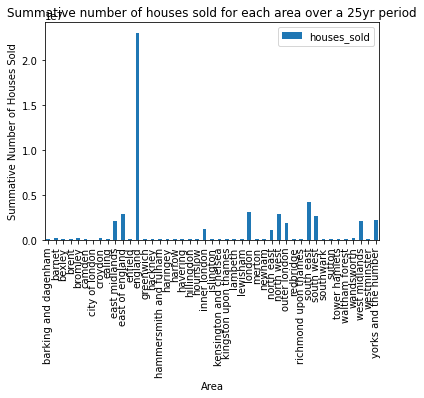

In [685]:
# houses_sold_for_each_groupby_area = df.groupby("area")["houses_sold"].sum()
# houses_sold_for_each_groupby_area.plot(kind="bar")
# plt.show()

# convert from groupbys to pivot tables
summative_houses_sold_for_each_area = df.pivot_table(values="houses_sold", index="area", aggfunc='sum')
summative_houses_sold_for_each_area.plot(title="Summative number of houses sold for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Summative Number of Houses Sold")
plt.show()

# on the basis of this plot - it would be interesting to remove 'England' as one of the areas!

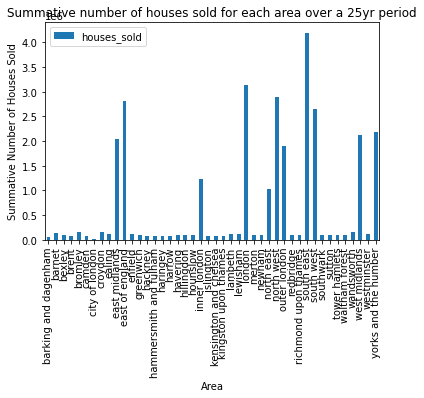

In [686]:
# not_including_england = df[(df["area"] != "england")]

summative_houses_sold_for_each_area_bar_england = not_including_england.pivot_table(values="houses_sold", index="area", aggfunc='sum')
summative_houses_sold_for_each_area_bar_england.plot(title="Summative number of houses sold for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Summative Number of Houses Sold")
plt.show()

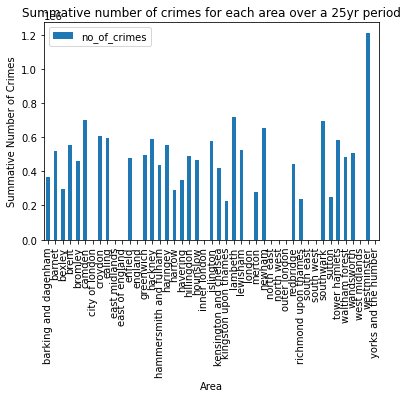

In [687]:
# crime_numbers_for_each_groupby_area = df.groupby("area")["no_of_crimes"].sum()
# crime_numbers_for_each_groupby_area.plot(kind="bar")
# plt.show()

# convert from groupbys to pivot tables
summative_crime_numbers_for_each_area = df.pivot_table(values="no_of_crimes", index="area", aggfunc='sum')
summative_crime_numbers_for_each_area.plot(title="Summative number of crimes for each area over a 25yr period", kind="bar")
plt.xlabel("Area")
plt.ylabel("Summative Number of Crimes")
plt.show()

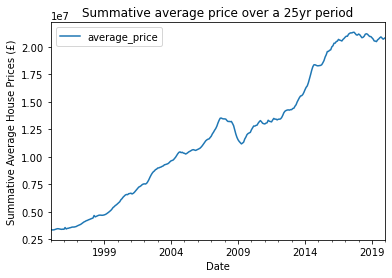

In [688]:
# average_price_for_each_groupby_date = df.groupby("date")["average_price"].sum()
# average_price_for_each_groupby_date.plot(x="date", y="average_price", kind="line")
# plt.show()

summative_average_price_for_each_date = df.pivot_table(values="average_price", index="date", aggfunc='sum')
summative_average_price_for_each_date.plot(title="Summative average price over a 25yr period", kind="line")
plt.xlabel("Date")
plt.ylabel("Summative Average House Prices (£)")
plt.show()

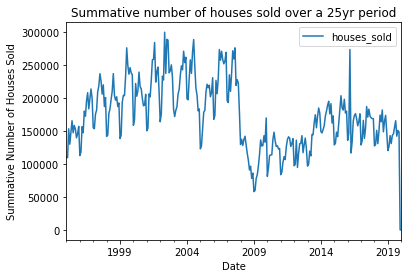

In [689]:
# houses_sold_for_each_groupby_date = df.groupby("date")["houses_sold"].sum()
# houses_sold_for_each_groupby_date.plot(x="date", y="houses_sold", kind="line")
# plt.show()

# convert from groupbys to pivot tables
summative_houses_sold_for_each_date = df.pivot_table(values="houses_sold", index="date", aggfunc='sum')
summative_houses_sold_for_each_date.plot(title="Summative number of houses sold over a 25yr period", kind="line")
plt.xlabel("Date")
plt.ylabel("Summative Number of Houses Sold")
plt.show()

# incomplete data for the yea 2020 may explain the sudden drop!
# try excluding the year 2020 ...

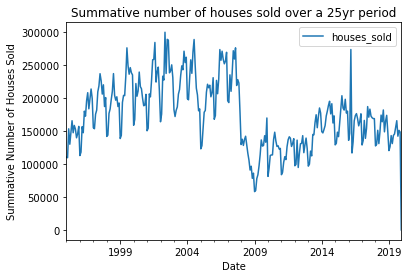

In [690]:
not_including_2020 = df[(df["year"] != 2020)]

summative_houses_sold_for_each_date_remove_2020 = not_including_2020.pivot_table(values="houses_sold", index="date", aggfunc='sum')
summative_houses_sold_for_each_date_remove_2020.plot(title="Summative number of houses sold over a 25yr period", kind="line")
plt.xlabel("Date")
plt.ylabel("Summative Number of Houses Sold")
plt.show()

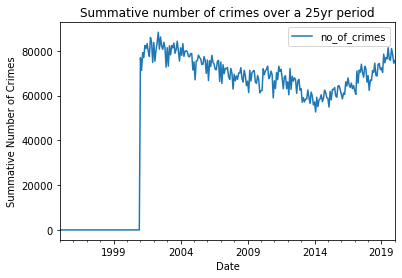

In [691]:
# crime_numbers_for_each_groupby_date = df.groupby("date")["no_of_crimes"].sum()
# crime_numbers_for_each_groupby_date.plot(x="date", y="no_of_crimes", kind="line")
# plt.show()

# convert from groupbys to pivot tables
summative_crime_numbers_for_each_date = df.pivot_table(values="no_of_crimes", index="date", aggfunc='sum')
summative_crime_numbers_for_each_date.plot(title="Summative number of crimes over a 25yr period", kind="line")
plt.xlabel("Date")
plt.ylabel("Summative Number of Crimes")
plt.show()

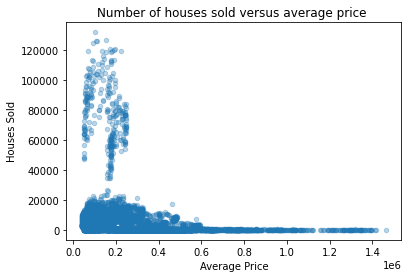

In [692]:
# check to see if there are relationships between numerical variables ...

df.plot(x="average_price", y="houses_sold", kind="scatter", title="Number of houses sold versus average price ", alpha=0.3)
plt.xlabel("Average Price")
plt.ylabel("Houses Sold")
plt.show()

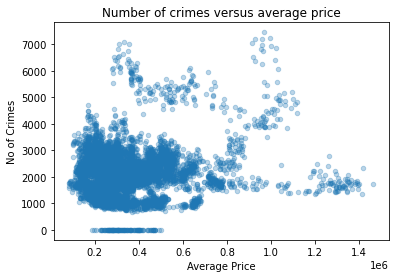

In [693]:
df.plot(x="average_price", y="no_of_crimes", kind="scatter", title="Number of crimes versus average price", alpha=0.3)
plt.xlabel("Average Price")
plt.ylabel("No of Crimes")
plt.show()

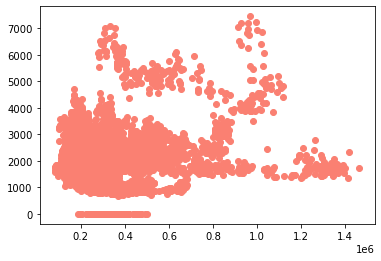

In [694]:
from scipy import stats

x = df["average_price"]
y = df["no_of_crimes"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color = "salmon")
plt.plot(x, mymodel)
plt.show()

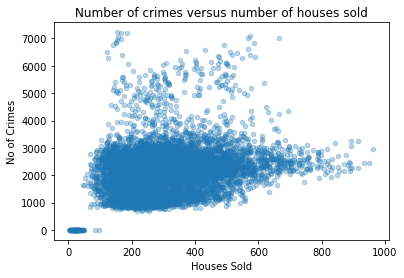

In [695]:
df.plot(x="houses_sold", y="no_of_crimes", kind="scatter", title="Number of crimes versus number of houses sold", alpha=0.3)
plt.xlabel("Houses Sold")
plt.ylabel("No of Crimes")
plt.show()

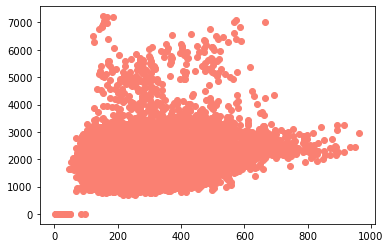

In [696]:
from scipy import stats

x = df["houses_sold"]
y = df["no_of_crimes"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color = "salmon")
plt.plot(x, mymodel)
plt.show()

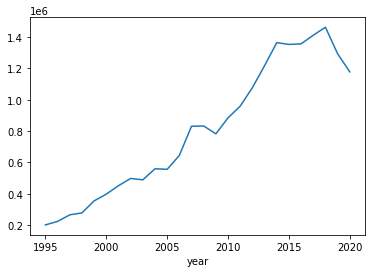

In [697]:
maximum_average_price_each_year = df.groupby('year').average_price.max()
maximum_average_price_each_year.plot(kind="line")
plt.show()

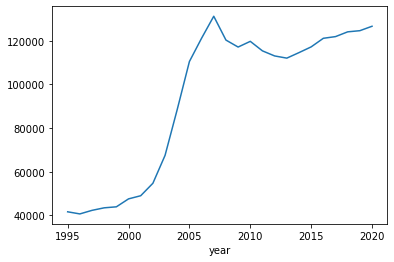

In [698]:
minimum_average_price_each_year = df.groupby('year').average_price.min()
minimum_average_price_each_year.plot(kind="line")
plt.show()

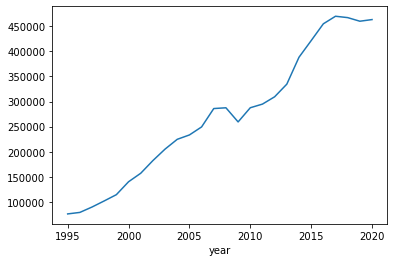

In [699]:
mean_average_price_each_year = df.groupby('year').average_price.mean()
mean_average_price_each_year.plot(kind="line")
plt.show()

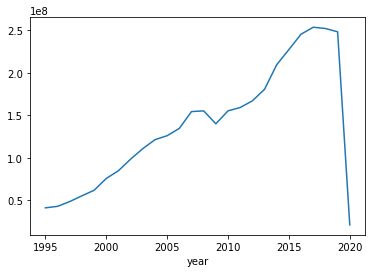

In [700]:
summative_average_price_each_year = df.groupby('year').average_price.sum()
summative_average_price_each_year.plot(kind="line")
plt.show()

# there is clearly an error here for 2019 to 2020!
# see what happens by excluding that year!

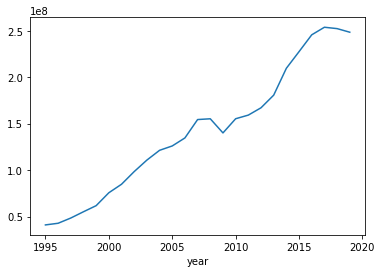

In [701]:
summative_average_price_each_year = not_including_2020.groupby('year').average_price.sum()
summative_average_price_each_year.plot(kind="line")
plt.show()                                                     